In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pickle
from sklearn.linear_model import LogisticRegression

In [3]:
df_purchase=pd.read_csv(r'C:\Users\admin\Desktop\purchase%20data.csv')


In [4]:
scaler=pickle.load(open('scaler.pickle','rb'))
pca=pickle.load(open('pca.pickle','rb'))
kmeans_pca=pickle.load(open('kmeans_pca.pickle','rb'))
features=df_purchase[['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']]
df_purchase_segm_std=scaler.transform(features)
df_purchase_segm_pca=pca.transform(df_purchase_segm_std)
purchase_segm_kmeans_pca=kmeans_pca.predict(df_purchase_segm_pca)
df_purchase_predictors=df_purchase.copy()
df_purchase_predictors['Segment']=purchase_segm_kmeans_pca
segment_dummies=pd.get_dummies(purchase_segm_kmeans_pca,prefix='Segment',prefix_sep='_')
df_purchase_predictors=pd.concat([df_purchase_predictors,segment_dummies],axis=1)

df_pa=df_purchase_predictors

# Purchase Probability Model

In [6]:
Y=df_pa['Incidence']
X=pd.DataFrame()
X['Mean Price']=(df_pa['Price_1']+
                df_pa['Price_2']+
                df_pa['Price_3']+
                df_pa['Price_4']+
                df_pa['Price_5'])/5

In [8]:
model_purchase=LogisticRegression(solver='sag')
model_purchase.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
model_purchase.coef_

array([[-2.34816166]])

# Price Elasticity Of Purchase Probability

In [10]:
df_pa[['Price_1','Price_2','Price_3','Price_4','Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [11]:
price_range=np.arange(0.5,3.5,0.01)

In [12]:
df_price_range=pd.DataFrame(price_range)

In [13]:
Y_pr=model_purchase.predict_proba(df_price_range)

In [14]:
purchase_pr=Y_pr[:][:,1]

In [15]:
pe=model_purchase.coef_[:,0]*price_range*(1-purchase_pr)

In [16]:
df_price_elasticities=pd.DataFrame(price_range)

In [17]:
df_price_elasticities=df_price_elasticities.rename(columns={0:'Price_Point'})

In [18]:
df_price_elasticities['Mean_PE']=pe
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096392
1,0.51,-0.100460
2,0.52,-0.104655
3,0.53,-0.108980
4,0.54,-0.113438
...,...,...
295,3.45,-8.013281
296,3.46,-8.038532
297,3.47,-8.063748
298,3.48,-8.088931


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

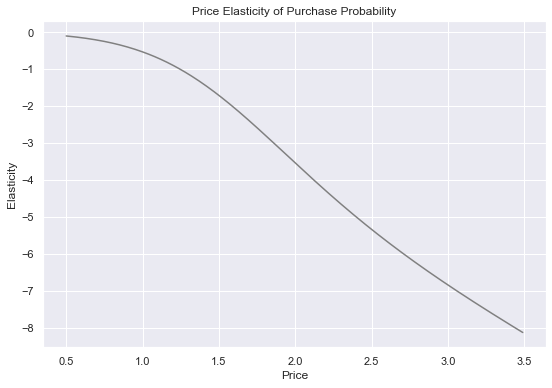

In [19]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

# Purchase Probability by Segments

# $\color{green}{\text{Segment 1 - Career-Focused}}$

In [20]:
df_pa_segment_1 = df_pa[df_pa['Segment'] == 1]

In [21]:
Y = df_pa_segment_1['Incidence']

In [22]:
X = pd.DataFrame()

In [23]:
X['Mean_Price'] = (df_pa_segment_1['Price_1'] + 
                   df_pa_segment_1['Price_2'] + 
                   df_pa_segment_1['Price_3'] + 
                   df_pa_segment_1['Price_4'] + 
                   df_pa_segment_1['Price_5']) / 5

In [24]:
model_incidence_segment_1 = LogisticRegression(solver = 'sag')
model_incidence_segment_1.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
model_incidence_segment_1.coef_

array([[-3.62970802]])

In [26]:
Y_segment_1 = model_incidence_segment_1.predict_proba(df_price_range)
purchase_pr_segment_1 = Y_segment_1[:][:, 1]
pe_segment_1 = model_incidence_segment_1.coef_[:, 0] * price_range * (1 - purchase_pr_segment_1)

# Results

In [27]:
df_price_elasticities['PE_Segment_1'] = pe_segment_1

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

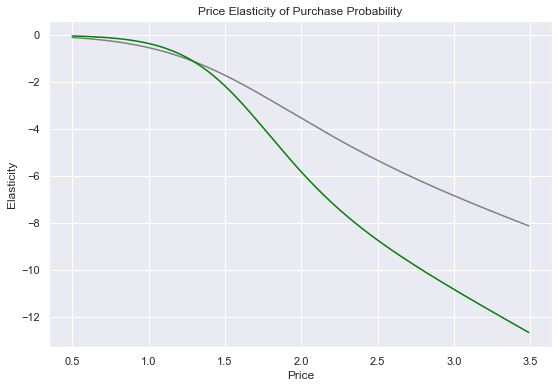

In [28]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

$\color{red}{\text{Segment 2 - Fewer-Opportunities}}$

In [29]:
df_pa_segment_2 = df_pa[df_pa['Segment'] == 2]


In [30]:
Y = df_pa_segment_2['Incidence']

X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_2['Price_1'] + 
                   df_pa_segment_2['Price_2'] + 
                   df_pa_segment_2['Price_3'] + 
                   df_pa_segment_2['Price_4'] + 
                   df_pa_segment_2['Price_5']) / 5

model_incidence_segment2 = LogisticRegression(solver = 'sag')
model_incidence_segment2.fit(X, Y)

model_incidence_segment2.coef_
Y_segment_2 = model_incidence_segment2.predict_proba(df_price_range)
purchase_pr_segment2 = Y_segment_2[:][: , 1]
pe_segment2 = model_incidence_segment2.coef_[:,0] * price_range * ( 1- purchase_pr_segment2)

In [31]:
df_price_elasticities['PE_Segment_2'] = pe_segment2

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

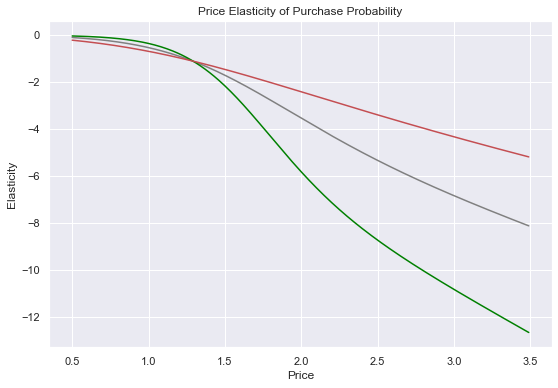

In [32]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

# Purchase Probability with Promotion Feature

# Data Preparation

In [33]:
Y = df_pa['Incidence']

In [34]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] + 
                   df_pa['Price_2'] + 
                   df_pa['Price_3'] + 
                   df_pa['Price_4'] + 
                   df_pa['Price_5']) / 5

In [35]:
X['Mean_Promotion'] = (df_pa['Promotion_1'] +
                       df_pa['Promotion_2'] +
                       df_pa['Promotion_3'] +
                       df_pa['Promotion_4'] +
                       df_pa['Promotion_5'] ) / 5
X.head()

,Mean_Price,Mean_Promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0


In [36]:
model_incidence_promotion = LogisticRegression(solver = 'sag')
model_incidence_promotion.fit(X, Y)
model_incidence_promotion.coef_


array([[-1.49408638,  0.56152764]])

In [37]:
df_price_elasticity_promotion = pd.DataFrame(price_range)
df_price_elasticity_promotion = df_price_elasticity_promotion.rename(columns = {0: "Price_Range"})


In [38]:
df_price_elasticity_promotion['Promotion'] = 1


In [39]:
Y_promotion = model_incidence_promotion.predict_proba(df_price_elasticity_promotion)


In [40]:
promo = Y_promotion[:, 1]
price_elasticity_promo = (model_incidence_promotion.coef_[:, 0] * price_range) * (1 - promo)

In [41]:
df_price_elasticities['Elasticity_Promotion_1'] = price_elasticity_promo
df_price_elasticities


,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2,Elasticity_Promotion_1
0,0.50,-0.096392,-0.031003,-0.210094,-0.125736
1,0.51,-0.100460,-0.032772,-0.216671,-0.129852
2,0.52,-0.104655,-0.034627,-0.223358,-0.134047
3,0.53,-0.108980,-0.036572,-0.230154,-0.138323
4,0.54,-0.113438,-0.038613,-0.237062,-0.142679
...,...,...,...,...,...
295,3.45,-8.013281,-12.506393,-5.110716,-4.861864
296,3.46,-8.038532,-12.543218,-5.127736,-4.880066
297,3.47,-8.063748,-12.580026,-5.144736,-4.898238
298,3.48,-8.088931,-12.616818,-5.161718,-4.916379


In [42]:
df_price_elasticity_promotion_no = pd.DataFrame(price_range)
df_price_elasticity_promotion_no = df_price_elasticity_promotion_no.rename(columns = {0: "Price_Range"})


In [43]:
df_price_elasticity_promotion_no['Promotion'] = 0


In [44]:
Y_no_promo = model_incidence_promotion.predict_proba(df_price_elasticity_promotion_no)


In [45]:
no_promo = Y_no_promo[: , 1]


In [46]:
price_elasticity_no_promo = model_incidence_promotion.coef_[:, 0] * price_range *(1- no_promo)


In [47]:
df_price_elasticities['Elasticity_Promotion_0'] = price_elasticity_no_promo


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability with and without Promotion')

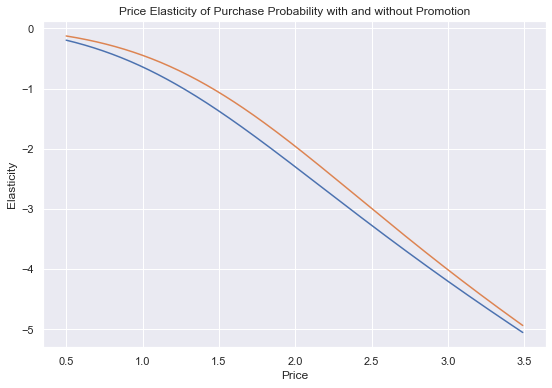

In [48]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_no_promo)
plt.plot(price_range, price_elasticity_promo)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with and without Promotion')